# SAE-98 - Nettoyage Dataset Users

**Objectif:** Charger, analyser et nettoyer le dataset Users

**Input:** `data/raw/yelp_academic_dataset_user4students.jsonl`

**Output:** `data/cleaned/users_clean.parquet`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
print("✅ Imports réussis")

✅ Imports réussis


In [2]:
RAW_DATA_PATH = Path('../data/raw/yelp_academic_dataset_user4students.jsonl')
CLEANED_DATA_PATH = Path('../data/cleaned/users_clean.parquet')
CLEANED_DATA_PATH.parent.mkdir(parents=True, exist_ok=True)

print(f"📂 Chargement: {RAW_DATA_PATH}")
print(f"💾 Sauvegarde: {CLEANED_DATA_PATH}")

📂 Chargement: ..\data\raw\yelp_academic_dataset_user4students.jsonl
💾 Sauvegarde: ..\data\cleaned\users_clean.parquet


In [3]:
print("⏳ Chargement... (1-2 min)")
users_df = pd.read_json(RAW_DATA_PATH, lines=True)
print(f"✅ {users_df.shape[0]:,} lignes, {users_df.shape[1]} colonnes")

⏳ Chargement... (1-2 min)
✅ 558,095 lignes, 22 colonnes


In [4]:
users_df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
3,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0
4,q_QQ5kBBwlCcbL1s4NVK3g,Jane,1221,2005-03-14 20:26:35,14953,9940,11211,"2006,2007,2008,2009,2010,2011,2012,2013,2014","xBDpTUbai0DXrvxCe3X16Q, 7GPNBO496aecrjJfW6UWtg...",1357,3.85,1713,163,191,361,147,1212,5696,2543,2543,815,323


In [5]:
users_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 558095 entries, 0 to 558094
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             558095 non-null  str    
 1   name                558095 non-null  str    
 2   review_count        558095 non-null  int64  
 3   yelping_since       558095 non-null  str    
 4   useful              558095 non-null  int64  
 5   funny               558095 non-null  int64  
 6   cool                558095 non-null  int64  
 7   elite               558095 non-null  str    
 8   friends             558095 non-null  str    
 9   fans                558095 non-null  int64  
 10  average_stars       558095 non-null  float64
 11  compliment_hot      558095 non-null  int64  
 12  compliment_more     558095 non-null  int64  
 13  compliment_profile  558095 non-null  int64  
 14  compliment_cute     558095 non-null  int64  
 15  compliment_list     558095 non-null  int64  


In [6]:
missing = pd.DataFrame({
    'Colonne': users_df.columns,
    'Manquantes': users_df.isnull().sum(),
    'Pct': (users_df.isnull().sum() / len(users_df) * 100).round(2)
}).sort_values('Pct', ascending=False)
missing[missing['Manquantes'] > 0]

,Colonne,Manquantes,Pct


In [7]:
users_clean = users_df.copy()
print(f"📋 Initial: {len(users_clean):,} lignes")

📋 Initial: 558,095 lignes


In [8]:
# Supprimer doublons
dups = users_clean.duplicated(subset=['user_id']).sum()
if dups > 0:
    users_clean = users_clean.drop_duplicates(subset=['user_id'])
    print(f"❌ {dups} doublons supprimés")
else:
    print("✅ Aucun doublon")

✅ Aucun doublon


In [9]:
# Supprimer lignes sans user_id
if users_clean['user_id'].isnull().any():
    before = len(users_clean)
    users_clean = users_clean.dropna(subset=['user_id'])
    print(f"❌ {before - len(users_clean)} sans user_id")
else:
    print("✅ Tous les user_id présents")

✅ Tous les user_id présents


In [10]:
# Remplir valeurs manquantes pour colonnes numériques
numeric_cols = ['review_count', 'useful', 'funny', 'cool', 'fans', 'average_stars']
for col in numeric_cols:
    if col in users_clean.columns:
        users_clean[col] = users_clean[col].fillna(0)

# Remplir valeurs manquantes pour colonnes texte
if 'name' in users_clean.columns:
    users_clean['name'] = users_clean['name'].fillna('Unknown')

print("✅ Valeurs manquantes traitées")

✅ Valeurs manquantes traitées


In [11]:
# Valider review_count >= 0
if 'review_count' in users_clean.columns:
    before = len(users_clean)
    users_clean = users_clean[users_clean['review_count'] >= 0]
    if before > len(users_clean):
        print(f"❌ {before - len(users_clean)} review_count négatifs")
    else:
        print("✅ review_count valides")

✅ review_count valides


In [12]:
# Valider average_stars entre 0 et 5
if 'average_stars' in users_clean.columns:
    before = len(users_clean)
    users_clean = users_clean[(users_clean['average_stars'] >= 0) & (users_clean['average_stars'] <= 5)]
    if before > len(users_clean):
        print(f"❌ {before - len(users_clean)} average_stars invalides")
    else:
        print("✅ average_stars valides (0-5)")

✅ average_stars valides (0-5)


In [13]:
# Convertir dates
if 'yelping_since' in users_clean.columns:
    users_clean['yelping_since'] = pd.to_datetime(users_clean['yelping_since'], errors='coerce')
    invalid = users_clean['yelping_since'].isnull().sum()
    if invalid > 0:
        print(f"⚠️ {invalid} dates invalides (conservées comme NaT)")
    else:
        print("✅ Dates converties")

✅ Dates converties


In [14]:
print("📊 RÉSUMÉ")
print("=" * 50)
print(f"Initial:    {len(users_df):,}")
print(f"Final:      {len(users_clean):,}")
print(f"Supprimé:   {len(users_df) - len(users_clean):,}")
print(f"Conservé:   {(len(users_clean) / len(users_df) * 100):.2f}%")

📊 RÉSUMÉ
Initial:    558,095
Final:      558,095
Supprimé:   0
Conservé:   100.00%


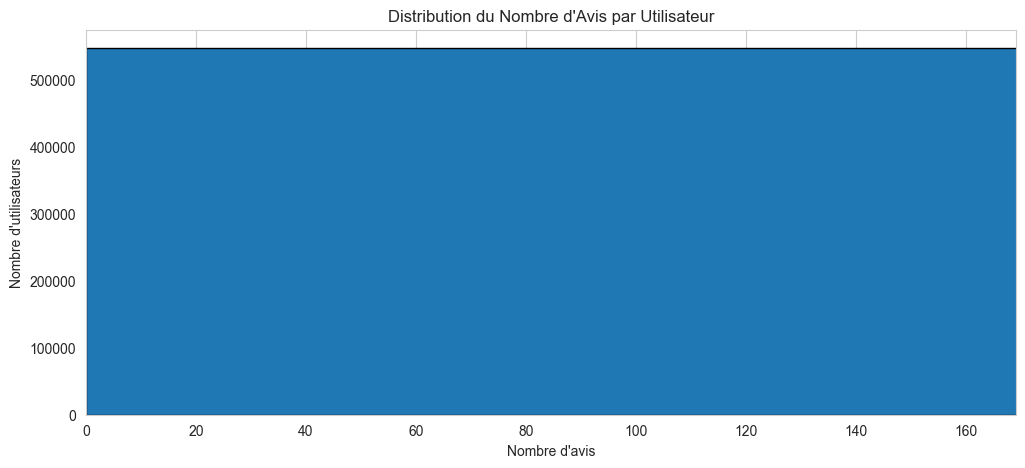

In [15]:
# Distribution review_count
if 'review_count' in users_clean.columns:
    plt.figure(figsize=(12, 5))
    plt.hist(users_clean['review_count'], bins=50, edgecolor='black')
    plt.xlabel('Nombre d\'avis')
    plt.ylabel('Nombre d\'utilisateurs')
    plt.title('Distribution du Nombre d\'Avis par Utilisateur')
    plt.xlim(0, users_clean['review_count'].quantile(0.95))
    plt.show()

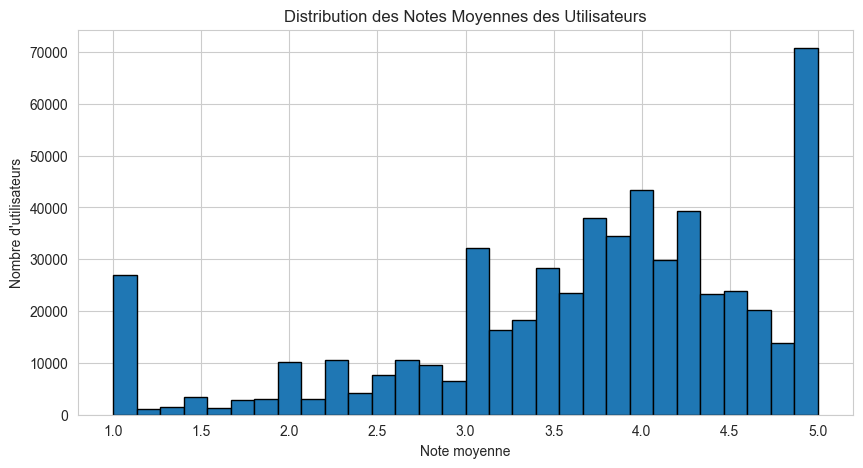

In [16]:
# Distribution average_stars
if 'average_stars' in users_clean.columns:
    plt.figure(figsize=(10, 5))
    users_clean['average_stars'].hist(bins=30, edgecolor='black')
    plt.xlabel('Note moyenne')
    plt.ylabel('Nombre d\'utilisateurs')
    plt.title('Distribution des Notes Moyennes des Utilisateurs')
    plt.show()

In [17]:
# Sauvegarder
print("⏳ Sauvegarde...")
users_clean.to_parquet(CLEANED_DATA_PATH, index=False, compression='snappy')
print(f"✅ Sauvegardé: {CLEANED_DATA_PATH}")
print(f"📊 Taille: {CLEANED_DATA_PATH.stat().st_size / 1024**2:.2f} MB")

⏳ Sauvegarde...
✅ Sauvegardé: ..\data\cleaned\users_clean.parquet
📊 Taille: 845.35 MB


In [18]:
# Test rechargement
test_df = pd.read_parquet(CLEANED_DATA_PATH)
print(f"✅ Test réussi: {len(test_df):,} lignes")

✅ Test réussi: 558,095 lignes


## ✅ SAE-98 Terminé

**Prochaines étapes:**
- SAE-67: Dashboard Profils Reviewers
- SAE-68: Dashboard Performance Établissements